---

**Import python libraries and set display options:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow
    
# Set pandas display options to show full column content
pd.set_option('display.max_colwidth', None)

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

---

**Import and inspect the data:**

In [2]:
# Read the CSV data file and save it as a parquet file (this step can be skipped if you alread have it saved as parquet) 
df_raw = pd.read_csv('Raw_data/datakit.csv')
df_raw.to_parquet('Raw_data/datakit.parquet')

In [3]:
# Read the parquet data file
df_raw = pd.read_parquet('Raw_data/datakit.parquet')

In [4]:
# Number of columns and rows 
print("Number of columns =", df_raw.shape[1])
print("Number of rows =", df_raw.shape[0])

Number of columns = 24
Number of rows = 20304843


In [5]:
# List of columns
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20304843 entries, 0 to 20304842
Data columns (total 24 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   question_id                 int64 
 1   question_user_id            int64 
 2   question_language           object
 3   question_content            object
 4   question_topic              object
 5   question_sent               object
 6   response_id                 int64 
 7   response_user_id            int64 
 8   response_language           object
 9   response_content            object
 10  response_topic              object
 11  response_sent               object
 12  question_user_type          object
 13  question_user_status        object
 14  question_user_country_code  object
 15  question_user_gender        object
 16  question_user_dob           object
 17  question_user_created_at    object
 18  response_user_type          object
 19  response_user_status        object
 20  

---

**Clean the data.**

In [6]:
# Number of missing data points (null values) in each column
null_summary = pd.DataFrame({
    'null_count': df_raw.isnull().sum(),
    'null_percentage': ((df_raw.isnull().sum() / len(df_raw)) * 100).round(0)
})
print(null_summary)

                            null_count  null_percentage
question_id                          0              0.0
question_user_id                     0              0.0
question_language                    0              0.0
question_content                     0              0.0
question_topic                 3537729             17.0
question_sent                        0              0.0
response_id                          0              0.0
response_user_id                     0              0.0
response_language                    0              0.0
response_content                     0              0.0
response_topic                13835556             68.0
response_sent                        0              0.0
question_user_type                   0              0.0
question_user_status                 0              0.0
question_user_country_code           0              0.0
question_user_gender          19713950             97.0
question_user_dob             19073559          

In [7]:
# Since most of the data points in the gender and dob columns are missing, we will remove these 4 columns.
df_raw = df_raw.drop(columns=['question_user_gender', 'question_user_dob', 
                               'response_user_gender', 'response_user_dob'])

In [8]:
# Count occurrences of each unique combination of question_id and response_id
df_raw[['question_id', 'response_id']].value_counts()

question_id  response_id
19636378     19640035       121
19636223     19674973       121
24422858     24424396       100
23507503     23509139       100
19635914     19641913        99
                           ... 
59254670     59254743         1
59254651     59254662         1
59254650     59255281         1
             59254746         1
59254647     59254682         1
Name: count, Length: 16283143, dtype: int64

Each question_id and response_id pair appears in multiple rows because each pair can have multiple associated question_topic and response_topic values. We will remove these duplicate rows, and thereby ignore question_topic/response_topic in the current analysis.

In [9]:
df_raw = df_raw.drop(columns=['question_topic', 'response_topic'])

In [10]:
# Number of columns and rows in the updated dataset 
print("Number of columns =", df_raw.shape[1])
print("Number of rows =", df_raw.shape[0])

Number of columns = 18
Number of rows = 20304843


In [11]:
# Count the number of duplicate rows
print("Number of duplicate rows =", df_raw.duplicated().sum())

Number of duplicate rows = 4021700


In [12]:
# Delete duplicate rows
df_raw.drop_duplicates(inplace=True)

In [13]:
# Number of columns and rows in the updated dataset 
print("Number of columns =", df_raw.shape[1])
print("Number of rows =", df_raw.shape[0])

Number of columns = 18
Number of rows = 16283143


---

**Basic info on response_users:**

In [14]:
# Count number of response_users
print("Number of response_users =", len(df_raw['response_user_id'].unique()))

Number of response_users = 960431


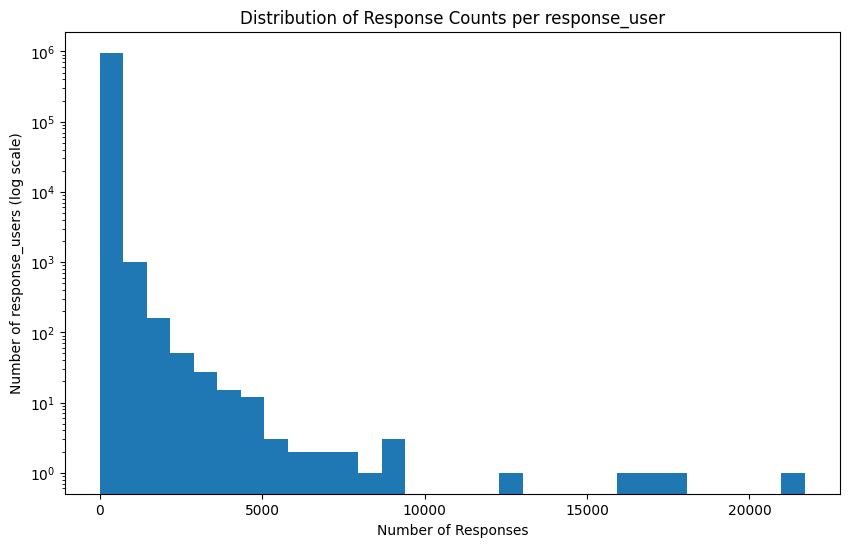

In [15]:
# Distribution of how many responses response_users have made (with log scale on y-axis)
df_raw['response_user_id'].value_counts().plot(kind='hist', bins=30, figsize=(10, 6), logy=True)
plt.xlabel('Number of Responses')
plt.ylabel('Number of response_users (log scale)')
plt.title('Distribution of Response Counts per response_user')
plt.show()

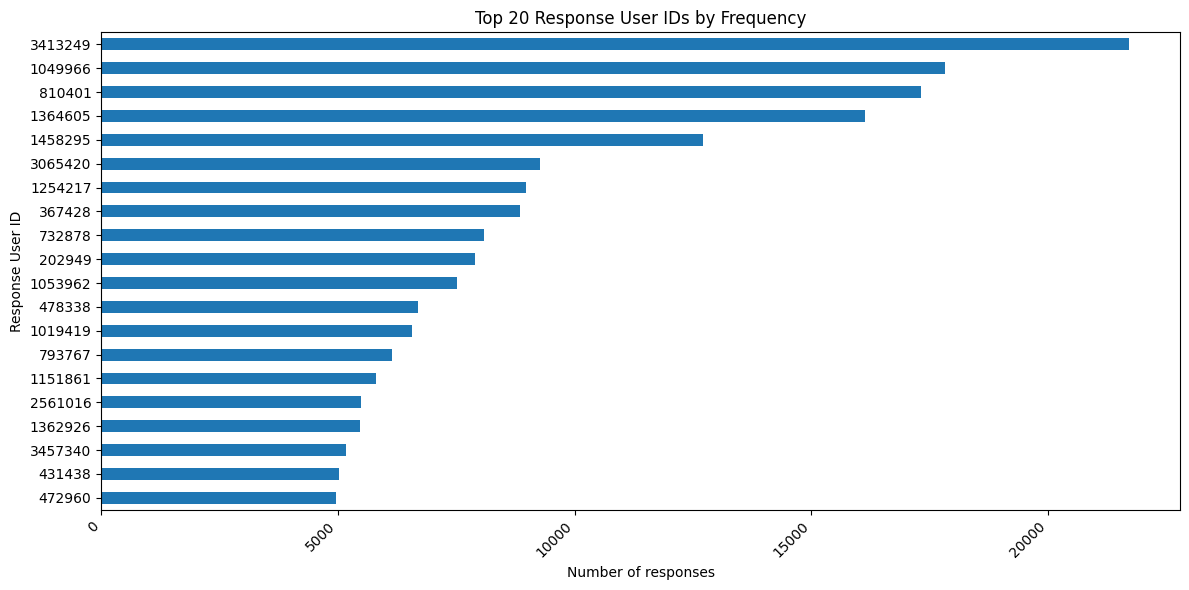

In [16]:
# Bar chart of how many times each response_user_id appears, showing only the top 20 most frequent users
df_raw['response_user_id'].value_counts().head(20).plot(kind='barh', figsize=(12, 6))
plt.gca().invert_yaxis()
plt.xlabel('Number of responses')
plt.ylabel('Response User ID')
plt.title('Top 20 Response User IDs by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

**Detailed info on response_users with the 20 most responses:**

---

In [17]:
# Display the top 20 response_users and their response counts
print(f"\nresponse_user_id:")
print(df_raw['response_user_id'].value_counts(dropna=True).head(20).to_frame().assign(
  percentage = (df_raw['response_user_id'].value_counts(normalize=True,dropna=True) * 100).round(1)
))


response_user_id:
                  count  percentage
response_user_id                   
3413249           21698         0.1
1049966           17826         0.1
810401            17319         0.1
1364605           16130         0.1
1458295           12702         0.1
3065420            9271         0.1
1254217            8980         0.1
367428             8843         0.1
732878             8075         0.0
202949             7890         0.0
1053962            7506         0.0
478338             6684         0.0
1019419            6573         0.0
793767             6136         0.0
1151861            5805         0.0
2561016            5488         0.0
1362926            5466         0.0
3457340            5159         0.0
431438             5029         0.0
472960             4957         0.0


In [19]:
# Get top 20 response users
top_20_users = df_raw['response_user_id'].value_counts().head(20).index

# Create summary for each user
summary_data = []

for user_id in top_20_users:
    user_data = df_raw[df_raw['response_user_id'] == user_id]
    
    # Basic counts
    total_responses = len(user_data)
    num_questions = user_data['question_id'].nunique()
    num_question_users = user_data['question_user_id'].nunique()
     
    # Response languages with percentages
    response_lang = user_data['response_language'].value_counts(normalize=True) * 100
    response_lang_str = '\n'.join([f"{lang}={round(pct, 0):.0f}%" for lang, pct in response_lang.items()])
    
    # Response user country code (taking the most common one)
    response_country = user_data['response_user_country_code'].mode()[0] if len(user_data['response_user_country_code'].mode()) > 0 else ''
    
    # Question languages with percentages
    question_lang = user_data['question_language'].value_counts(normalize=True) * 100
    question_lang_str = '\n'.join([f"{lang}={round(pct, 0):.0f}%" for lang, pct in question_lang.items()])
    
    # Question user country code (taking the most common one)
    question_country = user_data['question_user_country_code'].mode()[0] if len(user_data['question_user_country_code'].mode()) > 0 else ''
    
    summary_data.append({
        'response_user_id': user_id,
        'Total # of responses': total_responses,
        '# of questions responded to': num_questions,
        '# of question_users served': num_question_users,
        'Response languages': response_lang_str,
        'response_user_country_code': response_country,
        'Question languages': question_lang_str,
        'question_user_country_code': question_country
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Save to CSV
summary_df.to_csv('top_20_response_users_summary.csv', index=False)

# Display the table
summary_df.style.set_properties(**{'border': '1px solid black'})


,response_user_id,Total # of responses,# of questions responded to,# of question_users served,Response languages,response_user_country_code,Question languages,question_user_country_code
0,3413249,21698,6881,4082,swa=63% eng=37%,ke,eng=80% swa=20%,ke
1,1049966,17826,17535,12997,swa=93% eng=7%,ke,swa=100%,ke
2,810401,17319,16397,10773,swa=98% eng=2%,ke,swa=100%,ke
3,1364605,16130,15158,10806,eng=99% swa=1%,ke,eng=100%,ke
4,1458295,12702,11173,7576,swa=77% eng=23%,ke,swa=81% eng=19%,ke
5,3065420,9271,1104,894,swa=66% eng=34%,ke,eng=100%,ke
6,1254217,8980,8271,5457,eng=99% swa=1%,ke,eng=100%,ke
7,367428,8843,8147,6498,eng=99% swa=1%,ke,eng=100%,ke
8,732878,8075,7802,6112,nyn=95% eng=3% lug=2%,ug,nyn=100% eng=0%,ug
9,202949,7890,6338,4912,eng=98% swa=2%,ke,eng=100%,ke
